Suppose the interarrival time for a city bus has an exponential distribution with parameter 1/λ. A passenger arrives at a uniformly random time and records the time until the next bus arrives. What is the expected waiting time? Use a simulation to get an answer. Is the answer surprising? Now suppose instead that the interarrival time is U (0, 2λ). How does this change the situation? (Notice that the expected interarrival time is λ in both cases.) 

Note that there are 2 common, equivalent parameterizations of the exponential distribution. 
- Exponential( x  |  λ ) =  λ  e –λx . This is used in Shonkwiler & Mendivil. 
- Exponential( x  |  β ) =  β –1  e –x / β  . This is used in Scipy. So if you import scipy and generate exponentially distributed random values using scipy.random.exponential(beta), you should use β  =  λ –1 . This is an example of a difficult to compute value (the expected waiting time under two different distributions) with a counterintuitive result that be can simulated fairly easily.

In [1]:
import scipy
from random import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from numpy.random import exponential, uniform, normal


def busstop(lambd, p_pass=0.1, expo=True):
    t, next_bus = 0, None
    waiters, waittimes = np.array([]), np.array([])

    while len(waittimes) < 1000:
        if not next_bus or next_bus < t:
            next_bus = exponential(lambd) if expo else uniform(0, 2*lambd) # find next bus time
            waittimes = np.append(waittimes, t - waiters) # add waittimes
            waiters, t = np.array([]), 0 # reset
        else:
            waiters = np.append(waiters, t) if random() < p_pass else waiters
            t += .05        
    return waittimes

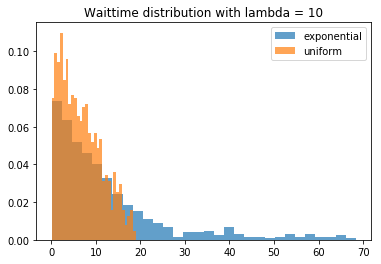

In [2]:
lambd=10
plt.hist(busstop(lambd), alpha=.7, label='exponential', density=True, bins=30)
plt.hist(busstop(lambd, expo=False), alpha=.7, label='uniform', density=True, bins=30)
plt.title(f"Waittime distribution with lambda = {lambd}")
plt.legend()
plt.show()

At age 50 Fannie Mae has $ \$ 150,000$  invested and will be investing another $\$ 10,000$  per year until age 70. Each year the investment grows according to an interest rate that is normally distributed with mean 8% and standard deviation 9%. At age 70, Fannie Mae then retires and withdraws $65,000 per year until death. Below is given a conditional death probability table. Thus if Fannie Mae lives until age 70, then the probability of dying before age 71 is 0.04979. Simulate this process 1000 times and histogram the amount of money Fannie Mae has at death.


In [3]:
data = {
    50: 0.00832,
    51: 0.00911,
    52: 0.00996,
    53: 0.01089,
    54: 0.01190,
    55: 0.01300,
    56: 0.01421,
    57: 0.01554,
    58: 0.01700,
    59: 0.01859,
    60: 0.02034,
    61: 0.02224,
    62: 0.02431,
    63: 0.02657,
    64: 0.02904,
    65: 0.03175,
    66: 0.03474,
    67: 0.03804,
    68: 0.04168,
    69: 0.04561,
    70: 0.04979,
    71: 0.05415,
    72: 0.05865,
    73: 0.06326,
    74: 0.06812,
    75: 0.07337,
    76: 0.07918,
    77: 0.08570,
    78: 0.09306,
    79: 0.10119,
    80: 0.10998,
    81: 0.11935,
    82: 0.12917,
    83: 0.13938,
    84: 0.15001,
    85: 0.16114,
    86: 0.17282,
    87: 0.18513,
    88: 0.19825,
    89: 0.21246,
    90: 0.22814,
    91: 0.24577,
    92: 0.26593,
    93: 0.28930,
    94: 0.31666,
    95: 0.35124,
    96: 0.40056,
    97: 0.48842,
    98: 0.66815,
    99: 0.72000,
    100: 0.76000,
    101: 0.80000,
    102: 0.85000,
    103: 0.90000,
    104: 0.96000,
105: 1.00000}

In [4]:
import matplotlib.pyplot as plt

def fanny_mae(data):
    age, wealth, death = 50, 150000, random()
    
    while death > data[age]:
        wealth = wealth + 10000 if age <= 70 else wealth - 65000
        wealth *= 1 + normal(0.08, 0.09)
        age += 1
    return wealth

fmsims = [fanny_mae(data) for i in range(1000)]
print(ss.describe(fmsims))

DescribeResult(nobs=1000, minmax=(-3829092.4150220603, 62551825.64048917), mean=4124088.8458530637, variance=34076256180400.047, skewness=3.8102030306968975, kurtosis=25.369799052674743)


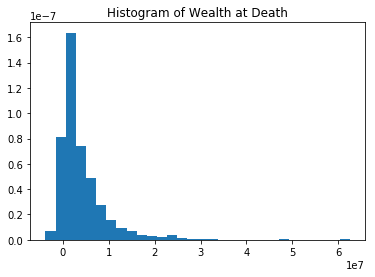

In [5]:
plt.hist(fmsims, density = True, bins = 30)
plt.title('Histogram of Wealth at Death')
plt.show()

In [3]:
import numpy as np
lambd = 1/50

print(np.random.exponential(scale = 1/lambd, size = 5))
print(np.mean(np.random.exponential(scale = 1/lambd, size = 10000)))

[85.3984811  47.02059559 23.39855494  3.61679769  6.88703204]
50.701983461338656


In [5]:
np.percentile(np.random.exponential(scale = 1/lambd, size = 10000), 99)

229.3205170918341

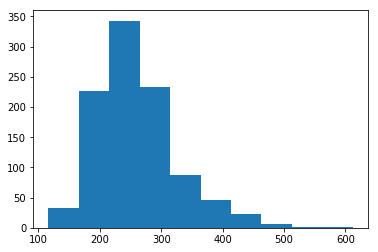

458.8346420376097


In [20]:
import matplotlib.pyplot as plt
times = [np.max(np.random.exponential(scale = 1/lambd, size = 100)) for i in range(1000)]
plt.hist(times)
plt.show()

print(np.percentile(times, 99))

232.78233171990598
129.34661542956496


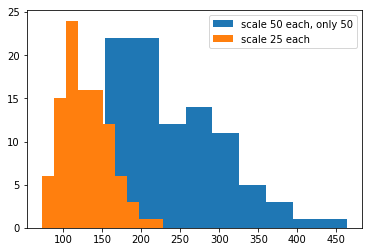

In [28]:
times1 = [np.max(np.random.exponential(scale = 50, size = 50)) for i in range(100)]
plt.hist(times1, label = 'scale 50 each, only 50')
print(np.mean(times1))

times2 = [np.max(np.random.exponential(scale = 25, size = 100)) for i in range(100)]
plt.hist(times2, label = 'scale 25 each')
print(np.mean(times2))


plt.legend()
